In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

path = "/Users/matteo/Projects/MFI_matteo/MFI"
os.chdir(path)

from pyMFI import MFI
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

In [2]:
path_data = "/Users/matteo/Projects/MFI_matteo/MFI/Manuscript_Results/Figure2"
os.chdir(path_data)

#Run simulation
#run_plumed.run_2D_Invernizzi(simulation_steps=10000000, gaus_pace=500, sigma=0.1, height=0.5, biasfactor=10, initial_position_x=1, initial_position_y=-1, file_extension="long")

In [3]:
#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_long")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="positioninve_long")

start=time.time()
#COMPUTE Mean force and weight of the simulation
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.05, kT = 1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), log_pace = 100, error_pace = 1, FES_cutoff=-1, nhills=10000)
end=time.time()
print(end-start)

#integration on a non-periodic domain
[X, Y, FES] = MFI.intgrad2(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

Total no. of Gaussians analysed: 10000


/Users/matteo/Projects/MFI_matteo/MFI/pyMFI/MFI.py:446: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|100/10000|==> Average Mean Force Error: 23.990727867813476
|200/10000|==> Average Mean Force Error: 26.453211921703218
|300/10000|==> Average Mean Force Error: 29.231580339317272
|400/10000|==> Average Mean Force Error: 28.021313277461456
|500/10000|==> Average Mean Force Error: 27.053719270905837
|600/10000|==> Average Mean Force Error: 26.199584264893428
|700/10000|==> Average Mean Force Error: 25.85490797080709
|800/10000|==> Average Mean Force Error: 25.56972017032282
|900/10000|==> Average Mean Force Error: 25.61424447555035
|1000/10000|==> Average Mean Force Error: 26.663668575174636
|1100/10000|==> Average Mean Force Error: 25.986230152779147
|1200/10000|==> Average Mean Force Error: 25.42382540552376
|1300/10000|==> Average Mean Force Error: 25.36672766939458
|1400/10000|==> Average Mean Force Error: 25.447206504752774
|1500/10000|==> Average Mean Force Error: 25.15770887110704
|1600/10000|==> Average Mean Force Error: 24.96327098399531
|1700/10000|==> Average Mean Force Error

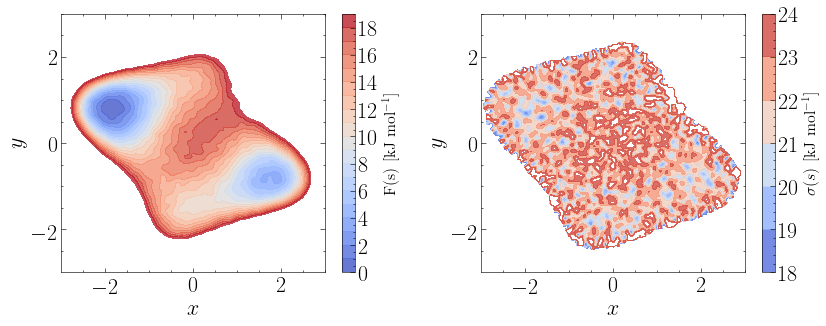

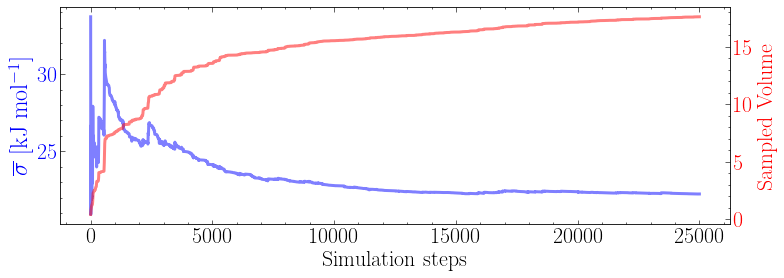

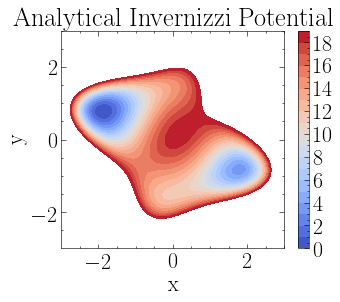

In [4]:
os.chdir(path_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 20, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(18, 25, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_A', dpi=600, bbox_inches='tight')

fig, axs = plt.subplots(1, 1, figsize=(12, 4))

OFE_long=ofe_history[1:]
time_OFE_long=[time for time in time_history[1:]]

axs.plot( [time for time in time_history[1:]], (ofe_history[1:]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Simulation steps')

ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6/200,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure2B', dpi=600, bbox_inches='tight')


grid = np.linspace(-3, 3, 200); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

plt.figure(figsize=(5,4)); 
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.xlabel("x"); plt.ylabel("y"); 
plt.title("Analytical Invernizzi Potential"); 
plt.colorbar()
plt.show()


In [5]:
sims_path = "/Users/matteo/Projects/MFI_matteo/MFI/Data_examples/Invernizzi_2D_potential"
os.chdir(sims_path)

simulation_steps = 250000
n_simulations = 25
master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
ofe_history_patch = [0]
ofe_history_patch_time = [0]

#for simulation in np.arange(0,n_simulations): 
    #print('Simulation: '+str(simulation), end="  |   ")
    #file_extension="" + str(int(simulation))
    #print(file_extension)

    #ipos=1.3*(2 * np.random.rand(2) - 1)

    #RUN short sim from random location
    #run_plumed.run_2D_Invernizzi(simulation_steps=simulation_steps, gaus_pace=500, sigma=0.1, height=0.5, biasfactor=10, initial_position_x=ipos[0], initial_position_y=ipos[1], file_extension=file_extension)
    

In [6]:
pbt_bandwidth = 0.05
n_simulations = 20

os.chdir(sims_path)


for simulation in np.arange(0,n_simulations): 
    
    print('Simulation: '+str(simulation), end="  |   ")
    file_extension="inve_" + str(int(simulation))
    print(file_extension)

    #Read the HILLS and position file file
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS" + file_extension)
    [position_x, position_y] = MFI.load_position_2D(position_name="position" + file_extension)

    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = pbt_bandwidth, kT = 1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)), log_pace = 2500, periodic=0, base_terms = master_patch[-1])
    
    #store results in master_array
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    #patch master and store result in master_patch
    master_patch.append(MFI.patch_2D(master))
    #save ofe history
    ofe_history_patch += ofe_history
    ofe_history_time_adj = [element+ofe_history_patch_time[-1] for element in time_history]
    ofe_history_patch_time += ofe_history_time_adj


Simulation: 0  |   inve_0
Total no. of Gaussians analysed: 500


/Users/matteo/Projects/MFI_matteo/MFI/pyMFI/MFI.py:446: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


Simulation: 1  |   inve_1
Total no. of Gaussians analysed: 500
Simulation: 2  |   inve_2
Total no. of Gaussians analysed: 500
Simulation: 3  |   inve_3
Total no. of Gaussians analysed: 500
Simulation: 4  |   inve_4
Total no. of Gaussians analysed: 500
Simulation: 5  |   inve_5
Total no. of Gaussians analysed: 500


In [ ]:
    
#find "standard devaition of mean force" map
[ofv] = MFI.mean_force_variance(master_patch[-1][0], master_patch[-1][1], master_patch[-1][2], master_patch[-1][3], master_patch[-1][4], master_patch[-1][5])
ofe_patch = np.sqrt(ofv)

#integration on a non-periodic! domain
[Xp, Yp, FES_patch] = MFI.intgrad2(master_patch[-1][2], master_patch[-1][3], min_grid=np.array((-3.0, -3.0)), max_grid=np.array((3.0, 3.0)))

# Plot Results
#shorten history to remove the first entry
ofe_history_patch = ofe_history_patch[1:]
ofe_history_patch_time = ofe_history_patch_time[1:]
#make "sim_start" list with only the first entry of a simulation
sim_start = [ofe_history_patch_time[i] for i in range(n_simulations)]
sim_start_error = [ofe_history_patch[i] for i in range(n_simulations)]


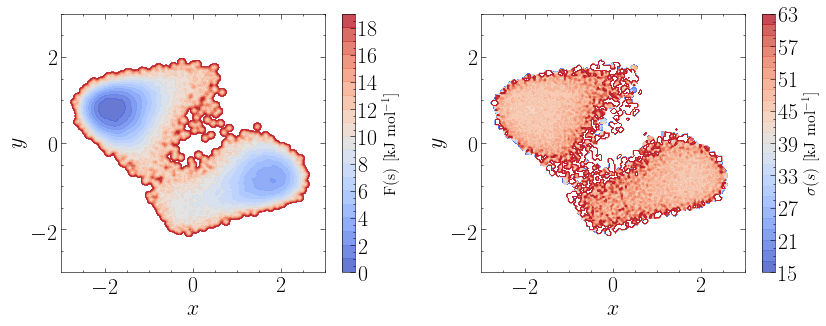

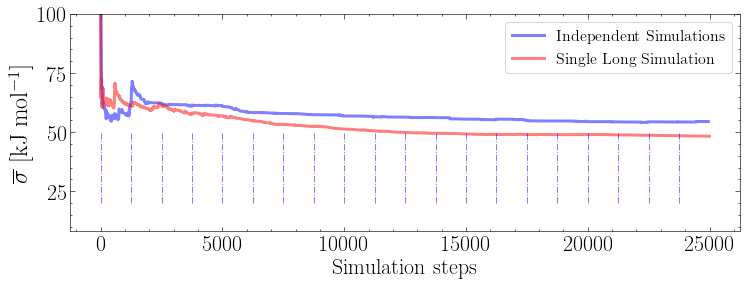

In [ ]:
os.chdir(path_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(Xp, Yp, FES_patch, levels=np.arange(0, 20, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe_patch*cutoff, levels=np.arange(15, 65, 2), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_C', dpi=600, bbox_inches='tight')

fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot( [time for time in ofe_history_patch_time[1:]], (ofe_history_patch[1:]),color='blue',alpha=0.5,linewidth=3,label="Independent Simulations");
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='black')
axs.tick_params(axis ='y', labelcolor = 'black')

axs.plot( time_OFE_long, OFE_long ,color='red',alpha=0.5,linewidth=3,label="Single Long Simulation");
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='black')

axs.set_xlabel('Simulation steps')

for i in np.arange(0,n_simulations):
    axs.plot([i*1250,i*1250],[20,50],'-.',color='blue',linewidth=1,alpha=0.5)

axs.set_ylim([8,100])

axs.legend(fontsize=16)

plt.savefig('Figure2_D', dpi=600, bbox_inches='tight')

#ax2 = axs.twinx()
#ax2.set_xlabel('Simulation steps')
#ax2.set_ylabel('Sampled Volume',color='red')
#ax2.tick_params(axis ='y', labelcolor = 'red')
#ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6/200,2)),color='red',alpha=0.5,linewidth=3);
